# Access and Visualization of Time Series with WTSS

**WTSS** is a lightweight web service for handling remote sensing imagery as time series. Given a location and a time interval you can retrieve the according time series as a Python list of real values.

The WTSS interface provides three operations:
- `list_coverages`: returns the list of all available coverages in the service.
    
- `describe_coverage`: returns the metadata of a given coverage.

- `time_series`: query the database for the list of values for a given location and time interval.

## Python Client API

For running the examples in this Jupyter Notebook you will need to install the [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py). To install it from PyPI using pip, use the following command:

In [3]:
!python -m pip install wtss

Processing /home/gribeiro/.cache/pip/wheels/eb/62/5d/4ec79a5541c32c72b985ede4eeecd276f43cfe88002ac9d8bf/wtss-0.5.0-py3-none-any.whl


In order to access the funcionalities of the client API, you should import the wtss package, as follows:

In [5]:
from wtss import wtss

After that, you should create a wtss object attached to a given service:

In [7]:
client = wtss('http://www.esensing.dpi.inpe.br/')

The above cell will create an object named `client` that will allow us to comunicate to the given WTSS service.

## Listing the Available Data Products

The `list_coverages` operation allows the client to retrieve the capabilities provided by any server that implements WTSS. Or simply put, it returns a list of coverage names available in a server instance. The server response is a JSON document. The names returned by this operation can be used in subsequent operations.

In [9]:
coverages = client.list_coverages()

In [10]:
coverages

{'coverages': ['MOD13Q1', 'MOD13Q1_M']}

##  Retrieving the Metadata of a Data Product

The `describe_coverage` operation returns the metadata for a given coverage identified by its name. It includes its range in the spatial and temporal dimensions. It also receives a JSON document as a response.

In [11]:
coverage_metadata = client.describe_coverage('MOD13Q1')

coverage_metadata.keys()

dict_keys(['name', 'description', 'detail', 'dimensions', 'spatial_extent', 'spatial_resolution', 'crs', 'timeline', 'attributes'])

If you want to access the coverage attribute name, you can use the `attributes` key, as shown below:

In [13]:
coverage_metadata["attributes"].keys()

dict_keys(['mir', 'blue', 'nir', 'red', 'evi', 'ndvi'])

The associated timeline can be accessed by the key `timeline`:

In [15]:
timeline = coverage_metadata['timeline']

start = timeline[0]
end = timeline[-1]

print(f'Interval range: [{start}, {end}]')

Interval range: [2000-02-18, 2019-09-30]


The cell code below shows the spatial extent:

In [16]:
coverage_metadata['spatial_extent']

{'xmin': -81.2341289433377,
 'xmax': -29.9999999973059,
 'ymin': -39.9999999964109,
 'ymax': 9.99999999910497}

## Retrieving the Time Series

The `time_series` operation retrieves the values associated to the time series for a set of coverage attributes at a given location.

The cell code below shows how to retrieve the values of the time series for the attribute `nir` from the `MOD13Q1` coverage.

In [17]:
time_series = client.time_series("MOD13Q1", ("nir"), -12.0, -54.0, "2018-01-01", "2018-12-31")

In [21]:
time_series.attributes["nir"]

[2328.0,
 2548.0,
 4123.0,
 2039.0,
 3764.0,
 2474.0,
 3189.0,
 2549.0,
 2563.0,
 2652.0,
 2647.0,
 2726.0,
 2657.0,
 2725.0,
 2842.0,
 3170.0,
 2684.0,
 3461.0,
 3284.0,
 3865.0,
 3561.0,
 4174.0,
 3425.0]

The timeline is also avaible from the time series object:

In [20]:
time_series.timeline

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 18),
 datetime.date(2018, 3, 6),
 datetime.date(2018, 3, 22),
 datetime.date(2018, 4, 7),
 datetime.date(2018, 4, 23),
 datetime.date(2018, 5, 9),
 datetime.date(2018, 5, 25),
 datetime.date(2018, 6, 10),
 datetime.date(2018, 6, 26),
 datetime.date(2018, 7, 12),
 datetime.date(2018, 7, 28),
 datetime.date(2018, 8, 13),
 datetime.date(2018, 8, 29),
 datetime.date(2018, 9, 14),
 datetime.date(2018, 9, 30),
 datetime.date(2018, 10, 16),
 datetime.date(2018, 11, 1),
 datetime.date(2018, 11, 17),
 datetime.date(2018, 12, 3),
 datetime.date(2018, 12, 19)]

## Visualizing the Time Series with Matplotlib

In [8]:
## Get x and y axis
x = [ str(date) for date in timeSeries.timeline ]
y = timeSeries.attributes["nir"]

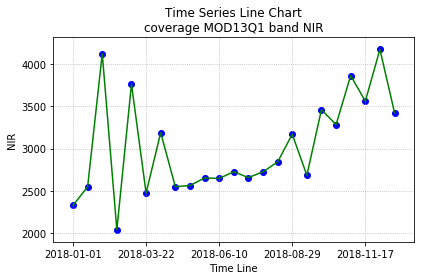

In [10]:
## Plotting the line chart with matplotlib
import numpy as np
import matplotlib.pyplot as plt
low_memory = False

fig, ax = plt.subplots()
ax.plot(x, y, color = "green")
plt.scatter(x, y, color = "blue")

plt.title("Time Series Line Chart\ncoverage MOD13Q1 band NIR")

plt.xlabel("Time Line")
plt.xticks(np.arange(0, len(x), step = 5.0))

plt.ylabel("NIR")

plt.autoscale()
plt.tight_layout()

plt.savefig("time_series_MOD13Q1_nir.png", bbox_inches = "tight")

plt.grid(linestyle = ':')

plt.show()